# Project name: Red Wine Quality Prediction

About Project: The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine.Use machine learning to determine which physiochemical properties make a wine 'good'!

In [109]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts

In [110]:
# Importing Dataset

ds= pd.read_csv("winequality-red.csv")
ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [111]:
df= pd.DataFrame(data=ds)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [112]:
df.shape

(1599, 12)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [114]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [115]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Conclusion: There is more difference in 75th percentile and max value in many columns such as residual sugar, free sulfur dioxide, total sulfur dioxide so there is outliers. In total sulfur dioxide column more SD present so data is spreaded more. Almost for all columns difference in mean and median is less so skewness is not present   

In [116]:
# Checking for Null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

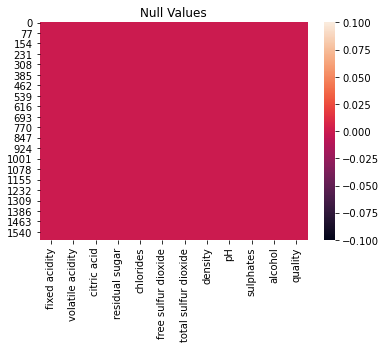

In [117]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

Conclusion: No null values  present in Dataset.

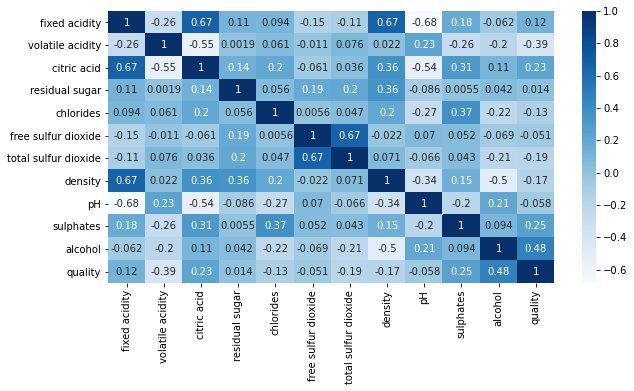

In [118]:
# Checking for correlation
corr_matrix= df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot= True, cmap= 'Blues')
plt.show()

Conclusion: Wine Quality is highly correlated to Alcohol and very less correlated to residual sugar.

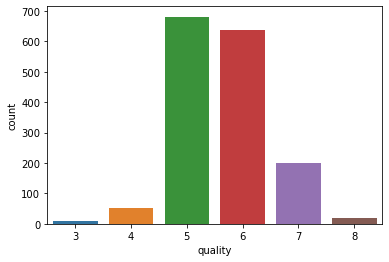

In [119]:
# Univariate Analysis

sns.countplot(x='quality', data=df)

Conclusion: Most of the wine quality is in between 5 and 6.

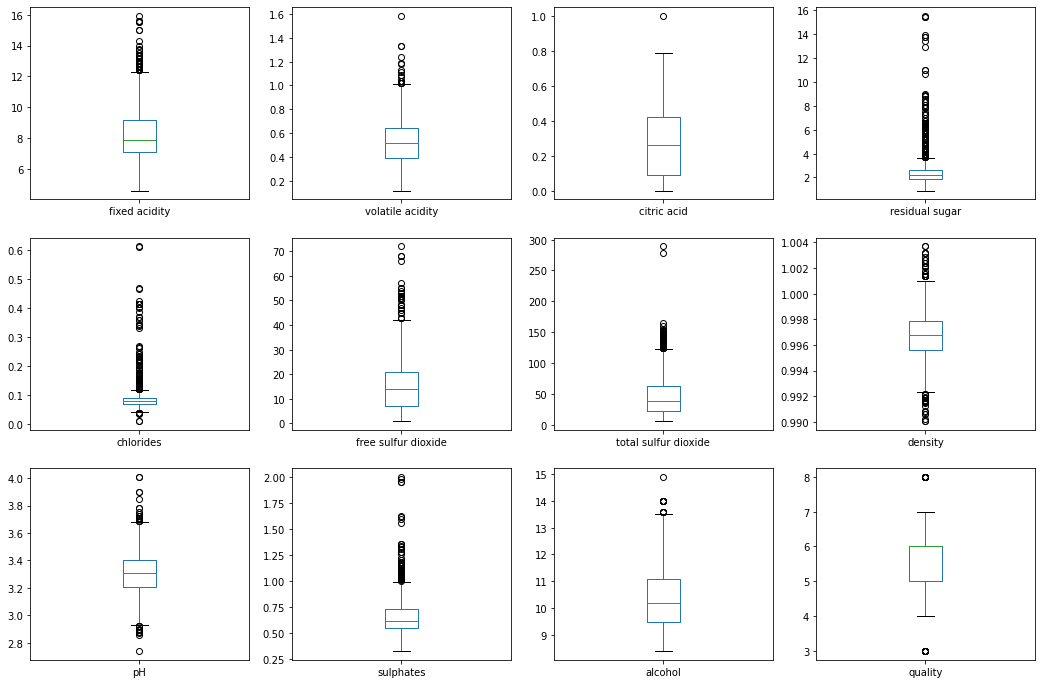

In [120]:
df.plot(kind= 'box', subplots= True, figsize=(18,12), layout= (3,4))
plt.show()

Conclusion: Almost every columns are with Outliers values except citric acid.

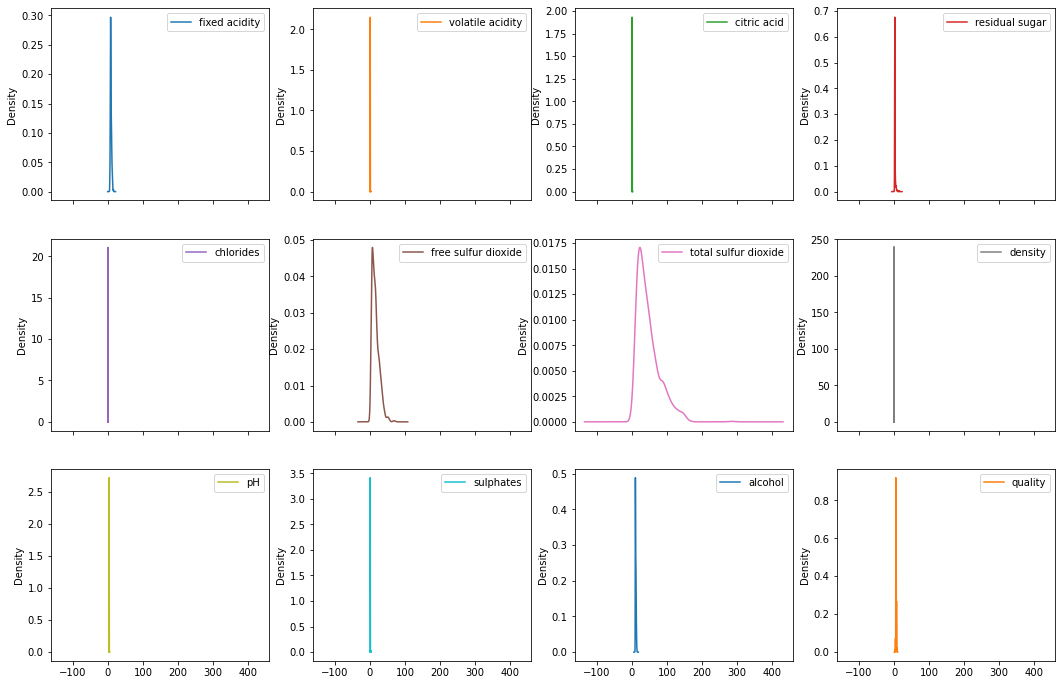

In [121]:
df.plot(kind= 'density', subplots= True, figsize=(18,12), layout= (3,4))
plt.show()

Conclusion: No skewness present in dataset.

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

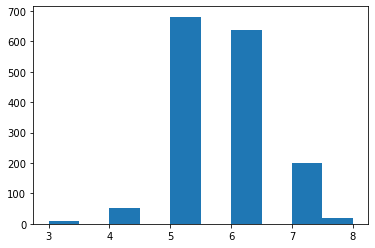

In [122]:
plt.hist(df['quality'])

In [123]:
#Conversion to classification problem
df['quality_new']= [1 if x >= 7 else 0 for x in df['quality']]
df['quality_new']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality_new, Length: 1599, dtype: int64

In [124]:
df['quality_new'].value_counts()

0    1382
1     217
Name: quality_new, dtype: int64

In [125]:
df.shape

(1599, 13)

In [126]:
# Removing outliers
from scipy.stats import zscore
z= np.abs(zscore(df))
threshold= 3
df_new= df[(z<3).all(axis=1)]
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_new
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [127]:
df_new.shape

(1451, 13)

In [128]:
df.shape

(1599, 13)

Conclusion= Almost 148 rows removed due to outliers.

In [129]:
#Separate feature variables and target variable
x= df_new.drop(['quality', 'quality_new'], axis= 1)
y= df_new['quality_new']

In [130]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_x= scaler.fit_transform(x)
new_x= pd.DataFrame(scaled_x, columns=x.columns)
x=new_x
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.552930,1.050914,-1.390400,-0.565439,-0.258851,-0.441060,-0.330784,0.635485,1.375896,-0.636458,-0.999856
1,-0.309900,2.119336,-1.390400,0.246832,0.790825,1.063255,0.790477,0.052390,-0.821951,0.288353,-0.608174
2,-0.309900,1.407054,-1.180831,-0.101284,0.504550,-0.011256,0.348768,0.169009,-0.396561,0.057150,-0.608174
3,1.755851,-1.442071,1.543569,-0.565439,-0.306564,0.203646,0.552634,0.752103,-1.105544,-0.482323,-0.608174
4,-0.552930,1.050914,-1.390400,-0.565439,-0.258851,-0.441060,-0.330784,0.635485,1.375896,-0.636458,-0.999856
...,...,...,...,...,...,...,...,...,...,...,...
1446,-1.282019,0.457346,-0.971261,-0.449401,0.409125,1.815413,0.008992,-1.055489,0.950506,-0.482323,0.077270
1447,-1.464291,0.160562,-0.866477,-0.217323,-0.926828,2.567570,0.246835,-0.927209,1.446794,0.904894,0.762714
1448,-1.221261,-0.076865,-0.709300,-0.101284,-0.258851,1.493059,-0.126918,-0.565690,0.737811,0.827826,0.566873
1449,-1.464291,0.724451,-0.761692,-0.449401,-0.306564,1.815413,0.008992,-0.723125,1.801286,0.519556,-0.216491


In [131]:
#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import PowerTransformer
import joblib
import warnings
warnings.filterwarnings('ignore')

In [132]:
# Splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.22, random_state=43)

In [133]:
lg= LogisticRegression()
lg.fit(x_train, y_train)
predlg= lg.predict(x_test)
print(accuracy_score(y_test, predlg))
print(confusion_matrix(y_test, predlg))
print(classification_report(y_test, predlg))

0.86875
[[263   9]
 [ 33  15]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       272
           1       0.62      0.31      0.42        48

    accuracy                           0.87       320
   macro avg       0.76      0.64      0.67       320
weighted avg       0.85      0.87      0.85       320



In [134]:
gnb= GaussianNB()
gnb.fit(x_train, y_train)
pred= gnb.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.85
[[237  35]
 [ 13  35]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       272
           1       0.50      0.73      0.59        48

    accuracy                           0.85       320
   macro avg       0.72      0.80      0.75       320
weighted avg       0.88      0.85      0.86       320



In [135]:
svc= SVC(kernel='rbf')
svc.fit(x_test, y_test)
svc.score(x_test, y_test)
predsvc= svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.925
[[270   2]
 [ 22  26]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       272
           1       0.93      0.54      0.68        48

    accuracy                           0.93       320
   macro avg       0.93      0.77      0.82       320
weighted avg       0.93      0.93      0.92       320



In [136]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc.score(x_train, y_train)
preddtc= dtc.predict(x_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.871875
[[248  24]
 [ 17  31]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       272
           1       0.56      0.65      0.60        48

    accuracy                           0.87       320
   macro avg       0.75      0.78      0.76       320
weighted avg       0.88      0.87      0.88       320



In [137]:
rf= RandomForestClassifier()
rf.fit(x_train, y_train)
pred= rf.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.928125
[[266   6]
 [ 17  31]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       272
           1       0.84      0.65      0.73        48

    accuracy                           0.93       320
   macro avg       0.89      0.81      0.84       320
weighted avg       0.92      0.93      0.92       320



In [138]:
ad= AdaBoostClassifier()
ad.fit(x_train, y_train)
pred= ad.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.86875
[[256  16]
 [ 26  22]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       272
           1       0.58      0.46      0.51        48

    accuracy                           0.87       320
   macro avg       0.74      0.70      0.72       320
weighted avg       0.86      0.87      0.86       320



In [139]:
XGB= XGBClassifier(random_state=1)
XGB.fit(x_train, y_train)
pred= XGB.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[15:38:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.925
[[260  12]
 [ 12  36]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       272
           1       0.75      0.75      0.75        48

    accuracy                           0.93       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.93      0.93      0.93       320



In [140]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scr_lg= cross_val_score(lg, x,y, cv=5)
print("CV score of LG- ", scr_lg.mean())

CV score of LG-  0.8731863964924754


In [141]:
scr_gnb= cross_val_score(gnb, x,y, cv=5)
print("CV score of GNB- ", scr_gnb.mean())

CV score of GNB-  0.8235217442824979


In [142]:
scr_svc= cross_val_score(svc, x,y, cv=5)
print("CV score of SVC- ", scr_svc.mean())

CV score of SVC-  0.868358810285579


In [143]:
scr_dtc= cross_val_score(dtc, x,y, cv=5)
print("CV score of DTC- ", scr_dtc.mean())

CV score of DTC-  0.8070031994312121


In [144]:
scr_rf= cross_val_score(rf, x,y, cv=5)
print("CV score of RF- ", scr_rf.mean())

CV score of RF-  0.8724920014219693


In [145]:
scr_ad= cross_val_score(ad, x,y, cv=5)
print("CV score of AD- ", scr_ad.mean())

CV score of AD-  0.851117430975234


In [146]:
scr_xg= cross_val_score(ad, x,y, cv=5)
print("CV score of AD- ", scr_xg.mean())

CV score of AD-  0.851117430975234


In [147]:
# Plotting AUC-ROC curve for best model- XGBoostClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [148]:
y_pred_prob= XGB.predict_proba(x_test)[:,1]
y_pred_prob

array([8.93887162e-01, 1.84927339e-04, 3.74597381e-03, 4.23392700e-03,
       1.40747975e-03, 7.67220627e-05, 9.77683783e-01, 1.03615916e-04,
       9.80928242e-01, 1.04730963e-04, 9.54199374e-01, 6.69305623e-01,
       2.21937386e-04, 2.38449738e-05, 1.33185904e-03, 2.60811485e-05,
       4.85479981e-02, 9.93917942e-01, 3.48182599e-04, 6.14693016e-03,
       9.91912365e-01, 5.93327451e-04, 3.57827097e-02, 1.03032077e-02,
       8.04418582e-04, 9.48666316e-03, 8.01112533e-01, 3.19442857e-04,
       4.92940599e-04, 9.45250452e-01, 1.95900630e-03, 2.23274095e-04,
       2.32882798e-04, 7.72984743e-01, 7.94048190e-01, 4.69993830e-01,
       6.21347353e-02, 6.44543767e-02, 9.02283072e-01, 1.61702873e-03,
       3.49462009e-03, 8.24948400e-03, 7.36476271e-04, 2.21154955e-03,
       5.81190884e-01, 2.66355625e-03, 5.10116108e-03, 1.15656447e-04,
       4.98345830e-02, 2.43579969e-03, 4.90251950e-05, 5.68263605e-02,
       2.39133369e-05, 1.66761149e-02, 2.57019559e-03, 4.60011433e-05,
      

In [149]:
fpr, tpr, thresholds= roc_curve(y_test, y_pred_prob)

In [150]:
fpr

array([0.        , 0.        , 0.        , 0.00367647, 0.00367647,
       0.00735294, 0.00735294, 0.01102941, 0.01102941, 0.01470588,
       0.01470588, 0.01470588, 0.01838235, 0.01838235, 0.02205882,
       0.02205882, 0.03308824, 0.03308824, 0.03676471, 0.03676471,
       0.04044118, 0.04044118, 0.04411765, 0.04411765, 0.05882353,
       0.05882353, 0.08823529, 0.08823529, 0.09558824, 0.09558824,
       0.16176471, 0.16176471, 0.16911765, 0.16911765, 0.17647059,
       0.17647059, 0.22058824, 0.22058824, 0.22426471, 0.23161765,
       0.26470588, 0.27941176, 0.29044118, 0.29779412, 0.32352941,
       0.32352941, 0.34558824, 0.35294118, 0.40441176, 0.40441176,
       0.42647059, 0.43382353, 0.46323529, 0.47058824, 0.625     ,
       0.63235294, 0.77941176, 0.78676471, 0.90441176, 0.91176471,
       0.92279412, 0.93014706, 1.        ])

In [151]:
tpr

array([0.        , 0.02083333, 0.1875    , 0.1875    , 0.27083333,
       0.27083333, 0.35416667, 0.35416667, 0.52083333, 0.52083333,
       0.54166667, 0.58333333, 0.58333333, 0.60416667, 0.60416667,
       0.625     , 0.625     , 0.64583333, 0.64583333, 0.66666667,
       0.66666667, 0.6875    , 0.6875    , 0.79166667, 0.79166667,
       0.8125    , 0.8125    , 0.83333333, 0.83333333, 0.85416667,
       0.85416667, 0.875     , 0.875     , 0.91666667, 0.91666667,
       0.9375    , 0.9375    , 0.95833333, 0.95833333, 0.95833333,
       0.95833333, 0.95833333, 0.95833333, 0.95833333, 0.95833333,
       0.97916667, 0.97916667, 0.97916667, 0.97916667, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

In [152]:
thresholds

array([1.9990923e+00, 9.9909234e-01, 9.7768378e-01, 9.7493410e-01,
       9.5419937e-01, 9.4666225e-01, 9.3848914e-01, 9.3774110e-01,
       8.7885326e-01, 8.7037534e-01, 8.6338669e-01, 8.5820335e-01,
       8.0639780e-01, 8.0111253e-01, 7.9404819e-01, 7.8267360e-01,
       7.1802104e-01, 7.1755993e-01, 6.7034155e-01, 6.6930562e-01,
       6.4666301e-01, 5.8119088e-01, 5.7350856e-01, 4.8396757e-01,
       3.7205055e-01, 2.9455912e-01, 1.4998788e-01, 1.4909086e-01,
       1.0717564e-01, 9.9086858e-02, 3.6234815e-02, 3.5782710e-02,
       3.2495234e-02, 3.0174416e-02, 2.4917694e-02, 1.8678036e-02,
       1.3196343e-02, 1.2667282e-02, 1.2602477e-02, 1.2388094e-02,
       8.0972724e-03, 7.8210188e-03, 7.3817372e-03, 7.1413722e-03,
       5.7057366e-03, 5.3414414e-03, 4.4834889e-03, 4.2339270e-03,
       3.2302269e-03, 3.1296546e-03, 2.5701956e-03, 2.5424566e-03,
       2.2115496e-03, 2.1289992e-03, 9.0531283e-04, 9.0290466e-04,
       2.3288280e-04, 2.2605299e-04, 7.6722063e-05, 7.6398275e

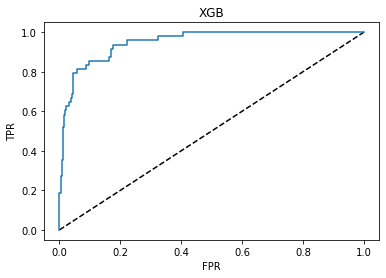

In [153]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label= 'XGBClassifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('XGB')
plt.show()

In [154]:
print(roc_auc_score(y_test, XGB.predict(x_test)))

0.8529411764705883


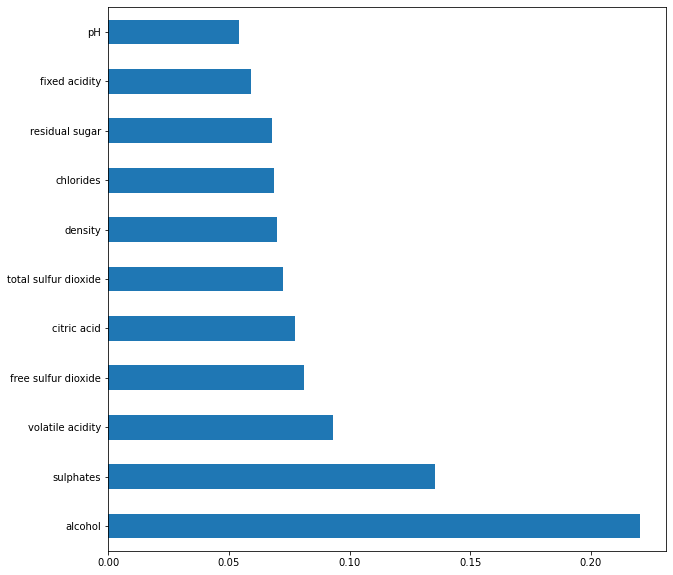

In [155]:
importances = pd.Series(XGB.feature_importances_, index=x.columns)
importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [156]:
# Filtering df for only good quality
df_temp = df[df['quality_new']==1]
df_temp.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_new
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949,1.0
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153,0.276443,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,7.000000,1.0
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000,7.000000,1.0
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000,7.000000,1.0
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000,7.000000,1.0
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,8.000000,1.0


In [157]:
# Filtering df for only bad quality
df_temp2 = df[df['quality_new']==0]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_new
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.0
mean,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,5.408828,0.0
std,1.682726,0.176337,0.189665,1.415778,0.049113,10.467685,32.585604,0.001808,0.154135,0.170629,0.969664,0.601719,0.0
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.0
25%,7.100000,0.420000,0.082500,1.900000,0.071000,8.000000,23.000000,0.995785,3.210000,0.540000,9.500000,5.000000,0.0
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.500000,0.996800,3.310000,0.600000,10.000000,5.000000,0.0
75%,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.410000,0.700000,10.900000,6.000000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,6.000000,0.0


Conclusion:Good quality wines have higher levels of alcohol on average, have a lower volatile acidity on average, higher levels of sulphates on average, and higher levels of residual sugar on average.

In [158]:
# Saving the best model
joblib.dump(XGB, 'red_wine_xgb_model.obj')

['red_wine_xgb_model.obj']